In [1]:
# Enable importing of utilities.
from sys import path
path.append("..")

# ARDC Training: Python Notebooks
Task-D: Land Change

> ### Import the Datacube Configuration

In [2]:
import datacube
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi()
dc = datacube.Datacube(app = 'ardc_task_d')
api.dc = dc

In [3]:
# Enable plotting
%matplotlib inline

In [4]:
# Supress Warning 
import warnings
warnings.filterwarnings('ignore')

>### Browse the available Data Cubes   

In [5]:
list_of_products = dc.list_products()
netCDF_products = list_of_products[list_of_products['format'] == 'NetCDF']
netCDF_products

,name,description,instrument,label,lat,product_type,creation_time,format,time,platform,lon,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
13,ls7_ledaps_ghana,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,LEDAPS,None,NetCDF,None,LANDSAT_7,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
17,ls7_ledaps_kenya,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,LEDAPS,None,NetCDF,None,LANDSAT_7,None,EPSG:4326,"(-0.000269493, 0.000269493)","(0.99981903, 0.99981903)","(latitude, longitude)"
18,ls7_ledaps_senegal,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,LEDAPS,None,NetCDF,None,LANDSAT_7,None,EPSG:4326,"(-0.000271152, 0.00027769)","(0.813456, 0.83307)","(latitude, longitude)"
16,ls7_ledaps_sierra_leone,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,LEDAPS,None,NetCDF,None,LANDSAT_7,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
19,ls7_ledaps_tanzania,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,LEDAPS,None,NetCDF,None,LANDSAT_7,None,EPSG:4326,"(-0.000271277688070265, 0.000271139577954979)","(0.999929558226998, 0.999962763497961)","(latitude, longitude)"
31,ls7_ledaps_vietnam,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,LEDAPS,None,NetCDF,None,LANDSAT_7,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
9,ls8_lasrc_ghana,Landsat 8 USGS Collection 1 Higher Level SR sc...,OLI_TIRS,None,None,LaSRC,None,NetCDF,None,LANDSAT_8,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
10,ls8_lasrc_kenya,Landsat 8 USGS Collection 1 Higher Level SR sc...,OLI_TIRS,None,None,LaSRC,None,NetCDF,None,LANDSAT_8,None,EPSG:4326,"(-0.000271309115317046, 0.00026957992707863)","(0.999502780827996, 0.999602369607559)","(latitude, longitude)"
11,ls8_lasrc_senegal,Landsat 8 USGS Collection 1 Higher Level SR sc...,OLI_TIRS,None,None,LaSRC,None,NetCDF,None,LANDSAT_8,None,EPSG:4326,"(-0.000271152, 0.00027769)","(0.813456, 0.83307)","(latitude, longitude)"


>### Pick a product  
>Use the platform and product names from the previous block to select a Data Cube.  

In [6]:
# Change the data platform and data cube here

platform = "LANDSAT_7"
# platform = "LANDSAT_8"

# product = "ls7_ledaps_ghana"
# product = "ls7_ledaps_kenya"
# product = "ls7_ledaps_senegal"
# product = "ls7_ledaps_sierra_leone"
# product = "ls7_ledaps_tanzania"
product = "ls7_ledaps_vietnam"

# Get Coordinates
coordinates = api.get_full_dataset_extent(platform = platform, product = product)

> #### Display Latitude-Longitude and Time Bounds of the Data Cube

In [7]:
from utils.data_cube_utilities.dc_time import _n64_to_datetime, dt_to_str

extents = api.get_full_dataset_extent(platform = platform, product = product, measurements=[])

latitude_extents = (min(extents['latitude'].values),max(extents['latitude'].values))
longitude_extents = (min(extents['longitude'].values),max(extents['longitude'].values))
time_extents = (min(extents['time'].values),max(extents['time'].values))

print("Latitude Extents:", latitude_extents)
print("Longitude Extents:", longitude_extents)
print("Time Extents:", list(map(dt_to_str, map(_n64_to_datetime, time_extents))))

Latitude Extents: (9.176425374578418, 13.964805165051667)
Longitude Extents: (102.40430421277932, 108.93092407802477)
Time Extents: ['1999-09-08', '2016-12-29']


# Visualize Data Cube Region

In [8]:
## The code below renders a map that can be used to orient yourself with the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

> ### Pick a smaller analysis region and display that region
Try to keep your region to less than 0.02-deg x 0.02-deg for rapid processing. This will give you a region of about 75x75 pixels. You can click on the map above to find the Lat-Lon coordinates of any location. You will want to identify a region with an urban aree or some known vegetation. Pick a time window of 10+ years, as the curvefit algorithm requires a long time series to detect change.
<br><br>
Here is what to expect ... 0.02-deg x 0.02-deg (75x75 pixels) over 10 years will take 10 to 15 minutes to execute. Be patient ... 

In [9]:
# Lam Dong Province near reservior 
# latitude_extents =  (11.843, 11.922)
# longitude_extents =  (107.723, 107.821)

latitude_extents =  (11.90, 11.92)
longitude_extents =  (107.76, 107.78)

time_extents = ('2001-01-01', '2005-12-31')

In [10]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

## Load the dataset and the required spectral bands or other parameters
After loading, you will view the Xarray dataset. Notice the dimensions represent the number of pixels in your latitude and longitude dimension as well as the number of time slices (time) in your time series.

In [11]:
from utils.data_cube_utilities.dc_load import load_simple

# Reduce the resolution of the data to reduce memory consumption and run time.
landsat_dataset, clean_mask, masks = \
    load_simple(dc, platform = platform, product=product, frac_res=0.1,
                load_params=dict(latitude = latitude_extents,
                                 longitude = longitude_extents,
                                 platform = platform,
                                 time = time_extents,
                                 product = product,
                                 measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']))
del clean_mask, masks

In [12]:
landsat_dataset
#view the dimensions and sample content from the cube

<xarray.Dataset>
Dimensions:    (latitude: 24, longitude: 24, time: 60)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-02T02:58:02 ... 2005-12-31T02:57:25
  * longitude  (longitude) float64 107.8 107.8 107.8 107.8 ... 107.8 107.8 107.8
  * latitude   (latitude) float64 11.92 11.92 11.92 11.92 ... 11.9 11.9 11.9
Data variables:
    red        (time, latitude, longitude) int16 476 434 369 ... -9999 -9999
    green      (time, latitude, longitude) int16 733 615 473 ... -9999 -9999
    blue       (time, latitude, longitude) int16 361 383 361 ... -9999 -9999
    nir        (time, latitude, longitude) int16 4688 4159 2511 ... -9999 -9999
    swir1      (time, latitude, longitude) int16 2160 1972 1217 ... -9999 -9999
    swir2      (time, latitude, longitude) int16 889 861 608 ... -9999 -9999
    pixel_qa   (time, latitude, longitude) int32 66 66 66 66 66 66 ... 1 1 1 1 1
Attributes:
    crs:      EPSG:4326

## PyCCD
The compute time of PyCCD scales sharply with extent sizes. Seemingly small areas can take anywhere from 10-15 minutes to process.

In [13]:
import utils.data_cube_utilities.dc_ccd as ccd

In [14]:
%time change_matrix = ccd.process_xarray(landsat_dataset, distributed = True, process = "matrix") #Run process xarray on large dataset

CPU times: user 4.06 s, sys: 65.2 ms, total: 4.13 s
Wall time: 1min 29s


In [15]:
%time change_volume = (change_matrix.sum(dim='time') - 1).rename('change_volume')

CPU times: user 943 µs, sys: 0 ns, total: 943 µs
Wall time: 951 µs


## Plotting change volume  
Plot change volume to identify regions/areas of change. The change volume represents the number of land changes for a pixel over the time series.

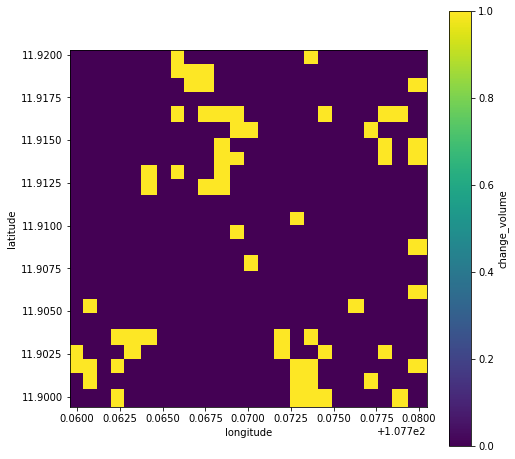

In [17]:
import matplotlib.pyplot as plt  
from utils.data_cube_utilities.plotter_utils import figure_ratio

plt.figure(figsize = figure_ratio(change_volume, fixed_width=8))
change_volume.plot()
plt.axes().set_aspect("equal")

## Plot the time of first changes

In [18]:
%time
time_map_ccd_product = ccd._nth_occurence_in_ccd_matrix(change_matrix, 1, f = ccd._n64_datetime_to_scalar)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.78 µs


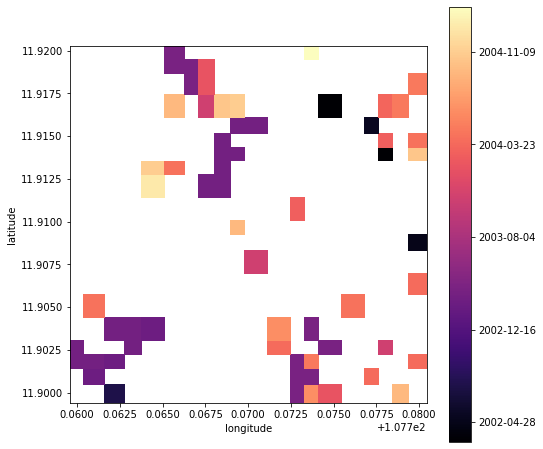

In [20]:
import datetime
from matplotlib.ticker import FuncFormatter

plt.figure(figsize = figure_ratio(time_map_ccd_product, fixed_width=8))
epochFormatter = FuncFormatter(lambda x, pos: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
time_map_ccd_product.plot(cmap = "magma", cbar_kwargs=({'format': epochFormatter}))
plt.axes().set_aspect("equal")

## Validating Change
Use the two images below to review scenes at the beginning of the time series and the end of the time series. 

### Review of RGB images
Choose an image from the start and end of the time series. Remember that 0 is the first acquisition and the last acquisition if the number of time steps. You can find that number in the XARRAY report above. Try various combinations of the start and end images to identify the land changes using visual interpretation. You will see some images will have clouds and others will have Landsat-7 "bands". You can also change the RGB image bands to give you an combination you desire. 

2001-04-08T02:57:43.000000000


(<Figure size 720x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f51ccf516d8>)

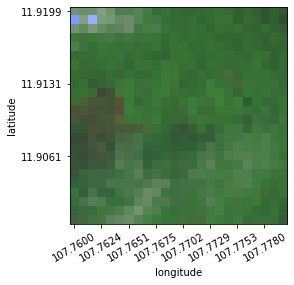

In [21]:
from utils.data_cube_utilities.dc_rgb import rgb

first = 2 # Acquisition Number ... change here

print( landsat_dataset.time.values[first] )

rgb( landsat_dataset,
     at_index = first,
     bands = ['swir2','nir','green'])

2005-03-02T02:57:20.000000000


(<Figure size 720x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f51ccf1e630>)

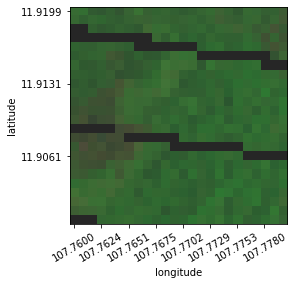

In [22]:
last = 50 # Acquisition Number ... change here

print( landsat_dataset.time.values[last] )

rgb(landsat_dataset,
    at_index = last,
    bands = ['swir2','nir','green'])

# Vogelmann NDVI Trend 

In [23]:
import utils.data_cube_utilities.trend as trend

In [24]:
import numpy as np

def land_and_water_masking_ls7(dataset):    
    #Create boolean Masks for clear and water pixels
    clear_pixels = dataset.pixel_qa.values == 2 + 64
    water_pixels = dataset.pixel_qa.values == 4 + 64

    a_clean_mask = np.logical_or(clear_pixels, water_pixels)
    return a_clean_mask

In [25]:
def remove_clouds(dataset):  
    return dataset.where(land_and_water_masking_ls7(dataset)).drop('pixel_qa')

In [26]:
def NDVI(dataset):
    return (dataset.nir - dataset.red)/(dataset.nir + dataset.red)

In [27]:
ndvi_trend_product = trend.linear(NDVI(remove_clouds(landsat_dataset)))

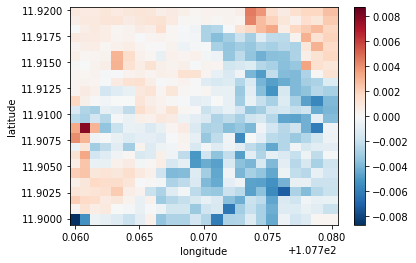

In [28]:
(-ndvi_trend_product).plot()